<hr>

<h1>Contenido</h1>

- [Transformaciones lineales](#Transformaciones-lineales)
- [Determinante](#Determinante)

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

#especial
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
jtplot.style()

<hr>
<h2>Transformaciones lineales</h2>

Una transformación lineal es un tipo de función particular, que se define entre dos espacios vectoriales y cumple las siguientes propiedades:

$$$$

- $T(\vec{x} + \vec{y}) = T(\vec{x}) + T(\vec{y})$
- $T(\alpha \vec{x}) = \alpha T(\vec{x})$

$$$$

Podemos entender que una transformación lineal es una función cuyo trabajo es movernos entre espacios vectoriales, o también podemos imaginar que deforman el espacio. Tomemos un ejemplo.
$$$$

$$T(x_1, x_2, x_3) = (x_1 + x_3, x_2 - 2x_3)$$
$$$$

Esta transformación nos va a llevar de $\mathbb{R}^3$ a $\mathbb{R}^2$. Las transformaciones lineales las podremos identificar también en una forma matricial:

$$$$

$$
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & -2\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix}
=
\begin{bmatrix}
x_1 + x_3\\
x_2 - 2x_3\\
\end{bmatrix}
$$





In [3]:
v = Matrix(symbols("x_1, x_2, x_3"))

In [4]:
v

Matrix([
[x_1],
[x_2],
[x_3]])

In [5]:
T = Matrix([[1, 0, 1], [0, 1, -2]])
T

Matrix([
[1, 0,  1],
[0, 1, -2]])

In [7]:
T * v

Matrix([
[  x_1 + x_3],
[x_2 - 2*x_3]])

Podemos imaginar que una transformación lineal deforma el espacio, conservando las rectas como rectas y también deja el origen fijo. Esto da la impresión de que la transformación _tuerce_ el espacio dándole una nueva forma.

$$$$

Para hacernos una idea clara de que hace una transformación lineal a los elementos que modifica, basta con fijarnos que hace a los vectores canonicos ($\hat{i}$ y $\hat{j}$), veamos por ejemplo la transformación lineal representada por la matriz:

$$$$

$$
\begin{bmatrix}
3 & 2\\
-2 & 1\\
\end{bmatrix}
$$


$$
\begin{bmatrix}
3 & 2\\
-2 & 1\\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
3\\
-2\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
3 & 2\\
-2 & 1\\
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
=
\begin{bmatrix}
2\\
1\\
\end{bmatrix}
$$

$$$$

Vemos que _envía_ a $\hat{i}$ al punto (3, -2) y a $\hat{j}$ al punto (2, 1) es decir podemos entender las columnas de esta matriz como la transformación aplicada a $\hat{i}$ y $\hat{j}$, y de esta forma podemos aplicar la transformación a un vector multiplicando el vector columna y la matriz de la transformación:

$$$$

$$
\begin{bmatrix}
3 & 2\\
-2 & 1
\end{bmatrix}
\begin{bmatrix}
5\\
7
\end{bmatrix}
=
\begin{bmatrix}
29\\
-3
\end{bmatrix}
$$

In [22]:
i = np.array([1, 0])
j = np.array([0, 1])
T = np.array([[3, 2], [-2, 1]])

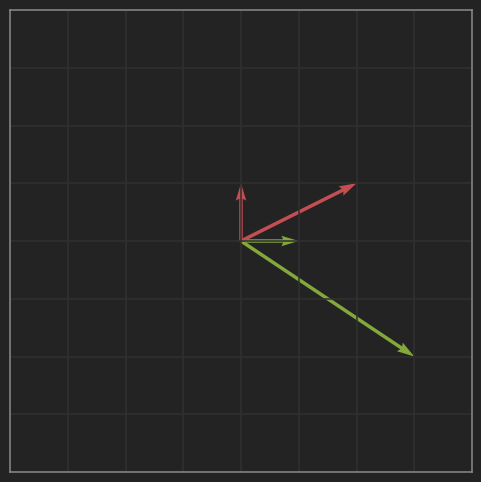

In [25]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.quiver([0], [0], [i[0]], [i[1]], color = 'g', scale = 8)
ax.quiver([0], [0], [(T @ i)[0]], [(T @ i)[1]], color = 'g', scale = 8)
ax.quiver([0], [0], [j[0]], [j[1]], color = 'r', scale = 8)
ax.quiver([0], [0], [(T @ j)[0]], [(T @ j)[1]], color = 'r', scale = 8)




ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xticklabels([])
ax.set_yticklabels([]);

$$T_1$$
$$T_2$$

$$T_2(T_1(\vec{x}))$$

$$(T_2T_1) \vec{x}$$

En caso de que las columnas de la matriz que representa la transformación lineal sean linealmente dependientes, significa que esta está reduciendo el [espacio vectorial](#Glosario) a uno de dimensión menor. como en el siguiente ejemplo:


<img src="Transformación de plano a recta.gif" width = 400 height = 400>

Ahora que podemos entender las transformaciones lineales como matrices, debemos notar que si aplicamos una transformación lineal a un vector, es decir, multiplicamos al vector por la matriz de la transformación, y luego multiplicamos por otra matriz que represente otra transformación, estaríamos aplicando primero una transformación y luego al resultado le estaríamos aplicando la segunda, en otras palabras estariamos realizando una _composición_ de transformaciones lineales.


$$T_2 T_1 X = T_2(X) \circ T_1(X)$$

<div class = "alert alert-success">
    <p>Nota: Todas las propiedades vistas hasta ahora en transformaciones lineales de dos dimensiones, pueden ser extendidas a dimensiones superiores </p>
</div>




In [ ]:
l = []
for x in xvals:
    for y in yvals:
        l.append([x, y])

In [26]:
np.column_stack([[1, 2], [3, 4], [5, 6]])

array([[1, 3, 5],
       [2, 4, 6]])

In [27]:
xvals = np.linspace(-4, 4, 9)
yvals = np.linspace(-3, 3, 7)
xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])

In [29]:
xygrid;

$$
xygrid = 
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n\\
y_1 & y_2 & \cdots & y_n\\
\end{bmatrix}
$$

$$$$

¿Cuál es el resultado de esta multiplicación?

$$$$

$$
\begin{bmatrix}
T_1 & T_3\\
T_2 & T_4\\
\end{bmatrix}
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n\\
y_1 & y_2 & \cdots & y_n\\
\end{bmatrix}
$$

$$2 \times 2 \cdot 2 \times n = 2 \times n$$

In [30]:
T = Matrix([["T_1", 'T_2'], ['T_3', 'T_4']])

In [31]:
T

Matrix([
[T_1, T_2],
[T_3, T_4]])

In [38]:
m = Matrix([['x_1', 'x_2', 'x_3'], ['y_1', 'y_2', 'y_3']])

In [39]:
m

Matrix([
[x_1, x_2, x_3],
[y_1, y_2, y_3]])

In [40]:
T * m

Matrix([
[T_1*x_1 + T_2*y_1, T_1*x_2 + T_2*y_2, T_1*x_3 + T_2*y_3],
[T_3*x_1 + T_4*y_1, T_3*x_2 + T_4*y_2, T_3*x_3 + T_4*y_3]])

In [ ]:
r = []
for v in l:
    r.append(T * v)

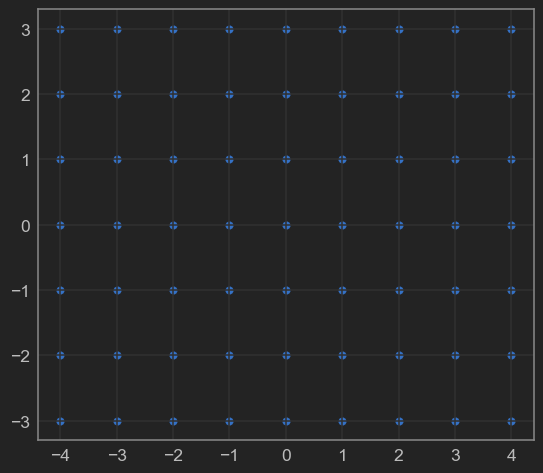

In [44]:
fig, ax = plt.subplots()

ax.scatter(xygrid[0, :], xygrid[1, :]);

In [45]:
def colorized(x, y):
    r = min(1, abs(1 - y / 3))
    g = min(1, abs(1 + y / 3))
    b = min(1, abs(1 / 4 + x / 16))
    
    return (r, g, b)

In [47]:
colorized(1, 3), colorized(4, 2)

((0.0, 1, 0.3125), (0.33333333333333337, 1, 0.5))

In [48]:
len('Daniel')

6

In [49]:
l = ['Daniel', 'Bilbo', 'Gandalf', 'Frodo']

In [51]:
list(map(len, l))

[6, 5, 7, 5]

In [52]:
map(len, l)

In [57]:
colors = list(map(colorized, xygrid[0, :], xygrid[1, :]))

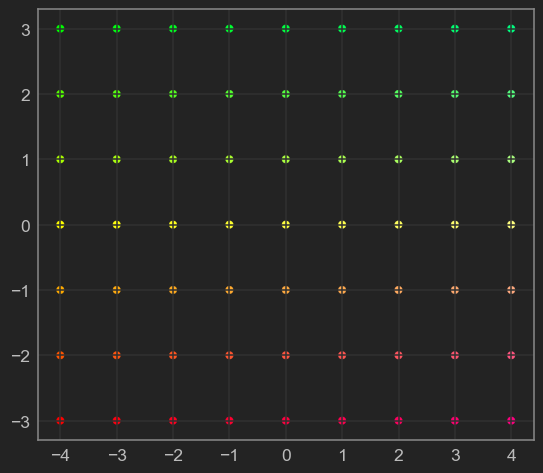

In [58]:
fig, ax = plt.subplots()

ax.scatter(xygrid[0, :], xygrid[1, :], color = colors);

In [60]:
T = np.array([[1, 0], [0, -1]])

In [61]:
T

array([[ 1,  0],
       [ 0, -1]])

In [67]:
uvgrid = T @ xygrid

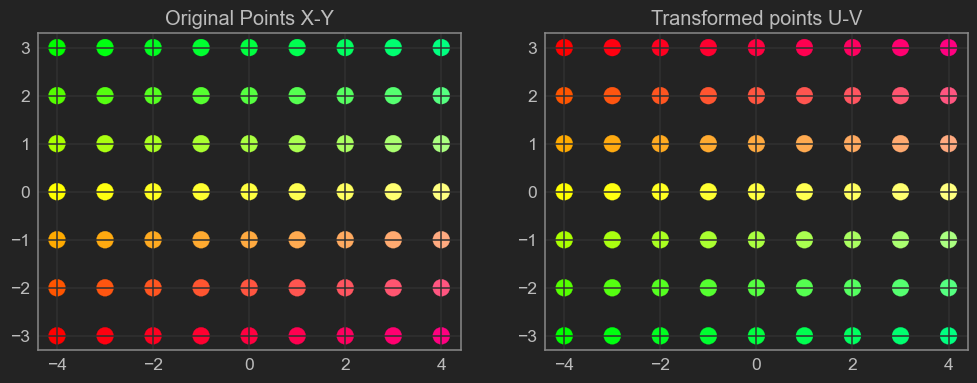

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax[0].scatter(xygrid[0, :], xygrid[1, :], color = colors, s = 150)
ax[0].set_title("Original Points X-Y")
ax[0].set_aspect('equal')

ax[1].scatter(uvgrid[0, :], uvgrid[1, :], color = colors, s = 150)
ax[1].set_title('Transformed points U-V')
ax[1].set_aspect('equal');

In [79]:
def stepwise_transform(T, points, n_steps = 30):
    
    trans_grid = np.zeros((n_steps + 1,) + points.shape)
    
    for j in range(n_steps + 1):
        intermediate = np.eye(T.shape[0]) + j / n_steps * (T - np.eye(T.shape[0]))
        trans_grid[j, :, :] = intermediate @ points
        
    return trans_grid

In [76]:
np.eye(T.shape[0])

array([[1., 0.],
       [0., 1.]])

In [73]:
(31, ) + xygrid.shape

(31, 2, 63)

In [81]:
stepwise_transform(T, xygrid);

In [92]:
def make_plot(transform):
    max_val = transform.max()
    
    ax.cla()
    pl = ax.scatter(transform[0, :], transform[1, :], color = colors, s = 150)
    ax.set_aspect('equal')
    ax.set_xlim(1.1 * np.array([-max_val, max_val]))
    ax.set_ylim(1.1 * np.array([-max_val, max_val]))
    
    return (pl, )

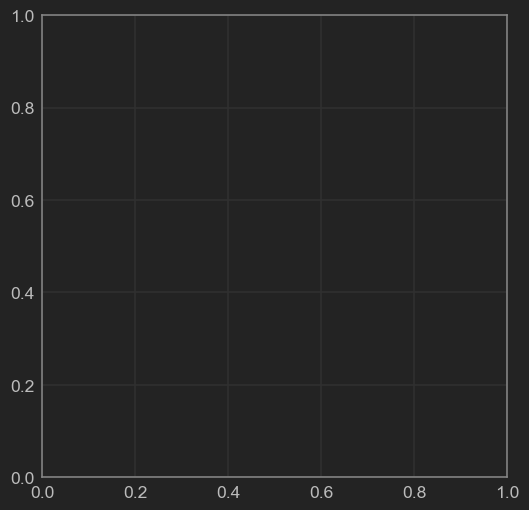

In [93]:
fig, ax = plt.subplots(figsize = (6, 6));

In [94]:
transform = stepwise_transform(T, xygrid)

In [95]:
animation = FuncAnimation(fig, make_plot, transform);

In [97]:
HTML(animation.to_html5_video())

In [ ]:
def make_animation(T)

<h4> Matriz de Rotación</h4>

una matriz de rotación es la matriz que representa una rotación en el espacio euclídeo. Por ejemplo, la matriz

$$
R(\theta)
=
\begin{bmatrix}
\cos{\theta} & - \sin{\theta}\\
\sin{\theta} & \cos{\theta}\\
\end{bmatrix}
$$

$$
R_x(\theta)
=
\begin{bmatrix}
1 & 0 & 0\\
0 & \cos{\theta} & - \sin{\theta}\\
0 & \sin{\theta} & \cos{\theta}\\
\end{bmatrix}
$$

[Regresar al Contenido](#Contenido)

<hr>
<h2>Determinante</h2>

<h3>Interpretación geométrica</h3>

$$$$

El determinante es algo complicado de definir formalmente, por lo que lo entenderemos como una función, que asigna a una [matriz cuadrada](#Glosario) un número real, para entender un poco del significado geométrico que tiene el determinante deberemos observar algunas transformaciones lineales, y ver como algunas parecen estirar el espacio, mientras que otras parecen encogerlo. Luego nos fijaremos en cómo cambian las áreas después de aplicar una transformación lineal, por ejemplo tomemos la transformación:

$$$$

$$
\begin{bmatrix}
3 & 0\\
0 & 2\\
\end{bmatrix}
$$

$$$$

Y nos fijaremos en el cuadrado que tiene por lado a $\hat{i}$ y $\hat{j}$ que tiene un área igual a 1, después de la transformación este se convierte en un rectángulo de área 6, es decir la transformación ha aumentado el área del cuadrado original 6 veces.

<img src="Determinante1.gif" width = 400 height = 400>

En cambio si nos fijamos en la transformación lineal:

$$$$

$$
\begin{bmatrix}
1 & 1\\
0 & 1\\
\end{bmatrix}
$$

$$$$

Vemos que esta convierte el cuadrado de área 1, en un paralelogramo que también tiene área 1.

<img src="Determinante2.gif" width = 400 height = 400>


Hay que tener en cuenta que al saber como se modifica el cuadrado unitario formado por $\hat{i}$ y $\hat{j}$, podemos saber como se modifica cualquier otra área, ya que cualquier área puede ser aproximada por cuadrados que se comporta igual que el unitario.

<img src="Determinate3.gif" width = 400 height = 400>
<img src="Determinante4.gif" width = 400 height = 400>

$$$$

A este factor de cambio que nos muestra como la transformación modifica el espacio _es_ el determinante de la transformación.

<h4>Calculo de Áreas</h4>

Nota que Esta idea nos permite hacer el cálculo de áreas, en particular las áreas de los parelogramos cuyos lados sean dos vectores que nosotros conozcamos.

<img src = https://upload.wikimedia.org/wikipedia/commons/a/a4/Determinant_de_vecteur_dim_2.jpg>

Por ejemplo imagina que en la imagen $\vec{X} = \begin{bmatrix} 2 \\ 3\\ \end{bmatrix}$ y $\vec{X}^\prime = \begin{bmatrix} 3 \\ 2\\ \end{bmatrix}$, entonces el parelogramo que se forma con ellos como lados es el resultado de aplicar al cuadro unitario la siguiente transformación lineal:

$$
\begin{bmatrix} 
2 & 3\\ 
3 & 2\\ 
\end{bmatrix}
$$

Si el determinante de una transformación es 0, es porque esta comprime el espacio en uno de menor dimensión.

Pero el determinante también puede ser un número negativo, y esto nos da información de la orientación en la que trabaja la transformación lineal. por ejemplo, la siguiente transformación parece dar la vuelta al plano:

<img src="Determinante5.gif" width = 400 height = 400>

<h3>Calculo de determinantes</h3>


El cálculo del determinante de una matriz de dimensión 2 o 3 es relativamente sencillo, para el caso de dimensión 2 se tiene:

$$det(A) = \left|
\begin{array}
 aa & b\\
 c & d
 \end{array}
 \right|
 = ad - bc
 $$
 
 Y para el caso de dimensión 3 se tiene:
 
 $$det(A) = \left|
\begin{array}
 aa & b & c\\
 d & e & f\\
 g & h & i\\
 \end{array}
 \right|
 =
 a
 \left|
 \begin{array}
 ae & f\\
 h & i\\
 \end{array}
 \right| 
 - b
 \left|
 \begin{array}
 ad & f\\
 g & i
 \end{array}
 \right| 
 + c
 \left|
 \begin{array}
 ad & e\\
 g & h
 \end{array}
 \right|
 $$

<h3>Ejercicios</h3>


- Calcular el volumen del paralelepípedo definido por los vectores: $\vec{a} = \begin{bmatrix} 5 \\ 3\\ 2\\\end{bmatrix}$, $\vec{b} = \begin{bmatrix} -1 \\ 4\\ 1\\\end{bmatrix}$, $\vec{c} = \begin{bmatrix} 1 \\ 1\\ 6\\\end{bmatrix}$